In [1]:
import numpy as np
import pandas as pd
import os
import networkx as nx
import random
import mutation
import crossover
import generator
import fitness
from datetime import datetime

In [2]:
# user given constants
src = 0
dst = 3
bandwidth_threshold = 2
# parameters
generation = 100
max_depth = 5
population_size = 80

In [3]:
random.seed(datetime.now())

In [4]:
#Read file related to testing
def get_test_file():
    '''Generator that return string of file name'''
    import re
    for files in os.listdir():
        if re.match('test.+\.csv', files) is not None:
            yield files
            
def csv_to_np(filename):
    return pd.read_csv(filename, header=None, delim_whitespace=True).values

# Use generator
bandwidth_matrix = generator.generate("complete", (1, 100), n=15).out(type="2d_list")

#bandwidth_matrix = csv_to_np('test1.csv')
print(type(bandwidth_matrix), '\n', bandwidth_matrix)

<class 'numpy.ndarray'> 
 [[  0  45  24  57  99  52  32  41  32  18  93  80  35  34  20]
 [ 45   0  57  27  32  59  52  71 100  46  39  47  19  20  13]
 [ 24  57   0 100  26  19  87   1  88   4  62  79  56  54  76]
 [ 57  27 100   0  36  52  43  49  35  48  67  33  46  35  94]
 [ 99  32  26  36   0  10  89  35  40  81  69  52  82  14  48]
 [ 52  59  19  52  10   0  49  40  86  34  23  91  10  37  26]
 [ 32  52  87  43  89  49   0  84  65  39  29  74  98  77  14]
 [ 41  71   1  49  35  40  84   0  98  42   7  21  92  13  98]
 [ 32 100  88  35  40  86  65  98   0  74  48  95  55  27  60]
 [ 18  46   4  48  81  34  39  42  74   0  41  67  73  20  60]
 [ 93  39  62  67  69  23  29   7  48  41   0   5  70  37  97]
 [ 80  47  79  33  52  91  74  21  95  67   5   0  15  89  23]
 [ 35  19  56  46  82  10  98  92  55  73  70  15   0  74  99]
 [ 34  20  54  35  14  37  77  13  27  20  37  89  74   0  22]
 [ 20  13  76  94  48  26  14  98  60  60  97  23  99  22   0]]


In [5]:
def np_to_nx(bandwidth_matrix):
    # build neighbor matrix
    neighbor_matrix = []
    for row, _ in enumerate(bandwidth_matrix):
        neighbor_matrix.append(np.where(bandwidth_matrix[row] > 0)[0])
    neighbor_matrix = np.array(neighbor_matrix)
    
    # build the list of edges
    edges = np.array(np.where(bandwidth_matrix > 0)).transpose()

    # build nx Graph instance
    G = nx.Graph()
    num_of_nodes = bandwidth_matrix.shape[0]
    G.add_nodes_from(range(num_of_nodes))
    G.add_edges_from(edges)
    return G, neighbor_matrix
    
G, neighbor_matrix = np_to_nx(bandwidth_matrix)

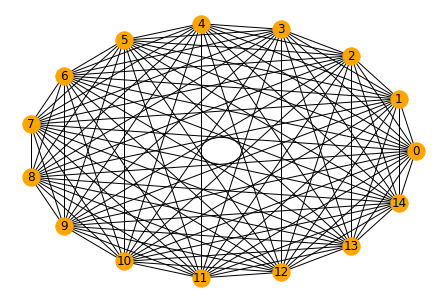

In [6]:
def nx_visualize(G):
    # Visualize the graph
    %matplotlib inline
    nx.draw_shell(G, with_labels=True, node_color='orange')

nx_visualize(G)

In [7]:
def initial(G, s, d, iddfs_depth, population_size):

    # Add shortest paths (seeding)
    shortest_path_generator = nx.all_shortest_paths(G, source=s, target=d)
    shortest_paths = list(shortest_path_generator)
    
    # Add worse path
    path_generator = nx.all_simple_paths(G, source=0, target=3, cutoff=iddfs_depth)
    paths = list(path_generator)

    long_paths = random.sample(paths, population_size - len(shortest_paths))
    
    return shortest_paths + long_paths

pop = initial(G, src, dst, max_depth, population_size)
print(pop)

[[0, 3], [0, 2, 1, 7, 6, 3], [0, 8, 6, 5, 9, 3], [0, 7, 6, 10, 11, 3], [0, 11, 13, 8, 1, 3], [0, 8, 6, 5, 14, 3], [0, 13, 5, 4, 6, 3], [0, 14, 9, 4, 10, 3], [0, 13, 10, 11, 12, 3], [0, 5, 12, 1, 10, 3], [0, 12, 13, 8, 2, 3], [0, 7, 12, 14, 9, 3], [0, 5, 2, 11, 3], [0, 7, 14, 9, 6, 3], [0, 8, 4, 6, 10, 3], [0, 14, 8, 5, 6, 3], [0, 13, 6, 2, 3], [0, 14, 8, 10, 4, 3], [0, 13, 12, 8, 14, 3], [0, 1, 12, 14, 5, 3], [0, 2, 9, 1, 3], [0, 4, 2, 13, 9, 3], [0, 13, 14, 7, 1, 3], [0, 4, 2, 6, 13, 3], [0, 1, 13, 6, 8, 3], [0, 13, 7, 9, 1, 3], [0, 2, 9, 10, 4, 3], [0, 11, 12, 4, 6, 3], [0, 5, 13, 6, 9, 3], [0, 1, 9, 7, 14, 3], [0, 6, 14, 1, 13, 3], [0, 9, 13, 4, 7, 3], [0, 11, 2, 9, 14, 3], [0, 2, 1, 9, 5, 3], [0, 11, 6, 5, 1, 3], [0, 5, 8, 11, 7, 3], [0, 4, 14, 5, 2, 3], [0, 12, 9, 5, 3], [0, 5, 9, 13, 1, 3], [0, 5, 10, 11, 2, 3], [0, 9, 6, 2, 11, 3], [0, 9, 6, 4, 10, 3], [0, 13, 9, 14, 12, 3], [0, 10, 2, 1, 9, 3], [0, 13, 11, 1, 7, 3], [0, 11, 10, 14, 3], [0, 2, 14, 10, 13, 3], [0, 6, 10, 9, 13, 3

In [8]:
# Edge density of graph
# This is for calculating parameter (但現在還沒做)
edge_density = G.size() * 2 / G.order() * (G.order() - 1)
print(edge_density)

196.0


In [9]:
# main loop

for g in range(generation):

    children_pop = []
    
    # crossover
    for idx in range(len(pop) - 1):
        child1, child2 = crossover.random_crossover(pop[idx], pop[idx + 1], bandwidth_matrix)
        pop += [child1, child2]
    
    # mutation
    for ind in pop:
        children_pop.append(mutation.mutation(neighbor_matrix, ind))

    # diversity maintenance
    pop = np.unique(pop + children_pop).tolist()
    
    # fitness evaluation
    pop_with_fit = fitness.population_with_fitness(pop, bandwidth_matrix)
    
    # selection
    pop = pd.DataFrame(sorted(pop_with_fit, key=lambda ind: ind['fitness'], reverse=True))
    #display(pop)
    pop = pop['individual'][0:population_size].tolist()

# count path length of each individual
path_length = []

for ind in pop:
    path_length.append(len(ind))

In [10]:
pop_with_fit = fitness.population_with_fitness(pop, bandwidth_matrix)
rst = pd.DataFrame(sorted(pop_with_fit, key=lambda ind: ind['fitness'], reverse=True))
rst['hop'] = path_length
rst.head()

,fitness,individual,hop
0,84,"[0, 8, 7, 3]",4
1,76,"[0, 3]",2
2,76,"[0, 3, 7, 3]",4
3,65,"[0, 8, 0, 13, 7, 9, 3]",7
4,62,"[0, 3, 11, 3, 11, 3, 12, 3]",8


In [11]:
# Ref: https://pythonhealthcare.org/tag/pareto-front/

def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(population_size):
            # Check if our 'i' pint is dominated by out 'j' point
            if all(scores[j] <= scores[i]) and any(scores[j] < scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

data = rst.drop(columns='individual').values
front_idx = identify_pareto(data)
pareto_front = data[front_idx]

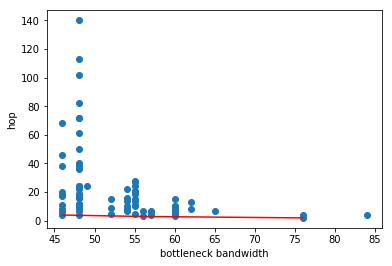

In [12]:
import matplotlib.pyplot as plt
plt.scatter(rst['fitness'], rst['hop'])
plt.plot(pareto_front[:, 0], pareto_front[:, 1], color='r')
plt.xlabel('bottleneck bandwidth')
plt.ylabel('hop')
plt.show()

In [13]:
rst

,fitness,individual,hop
0,84,"[0, 8, 7, 3]",4
1,76,"[0, 3]",2
2,76,"[0, 3, 7, 3]",4
3,65,"[0, 8, 0, 13, 7, 9, 3]",7
4,62,"[0, 3, 11, 3, 11, 3, 12, 3]",8
5,62,"[0, 11, 3, 9, 3, 7, 14, 12, 9, 3, 9, 7, 3]",13
6,60,"[0, 3, 9, 0, 3]",5
7,60,"[0, 3, 9, 0, 3, 9, 0, 10, 12, 3]",10
8,60,"[0, 3, 9, 0, 3, 9, 3, 7, 9, 12, 9, 3, 9, 7, 3]",15
9,60,"[0, 4, 3, 0, 13, 0, 9, 0, 9, 3]",10
